<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [ ]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [ ]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [ ]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [ ]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5,1,'Estimators vs score at depth of 5')

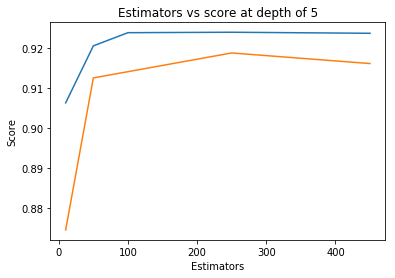

In [ ]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


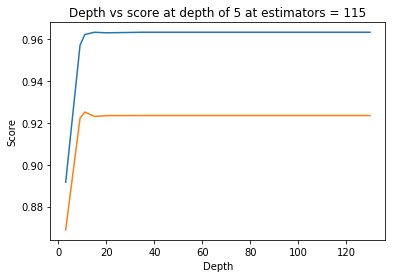

In [ ]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96225043 0.96215493 0.96057081 0.96194015 0.96330005]
mean train scores [0.96294922 0.96266735 0.96115674 0.96263457 0.96430539]


In [ ]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [ ]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [ ]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [ ]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


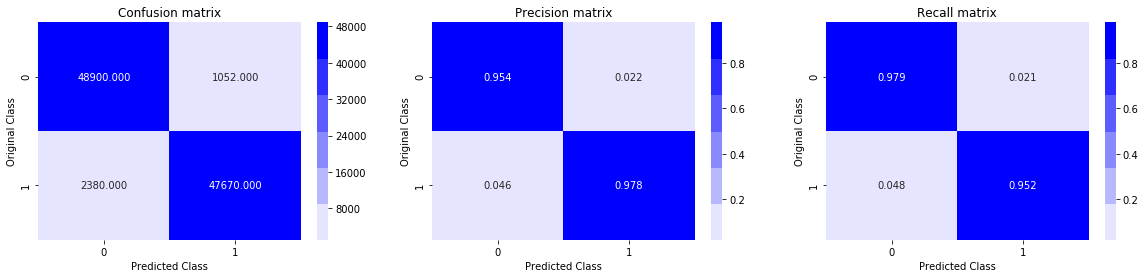

Test confusion_matrix


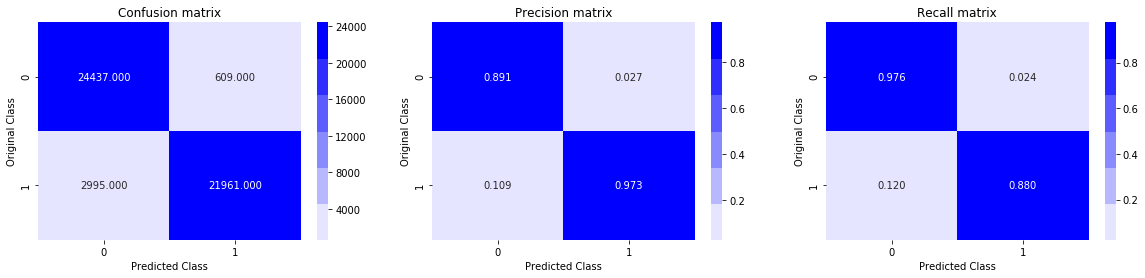

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

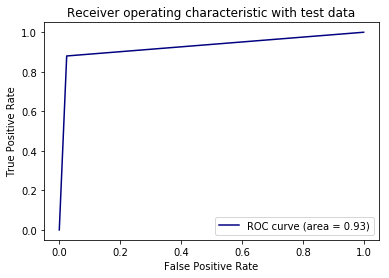

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

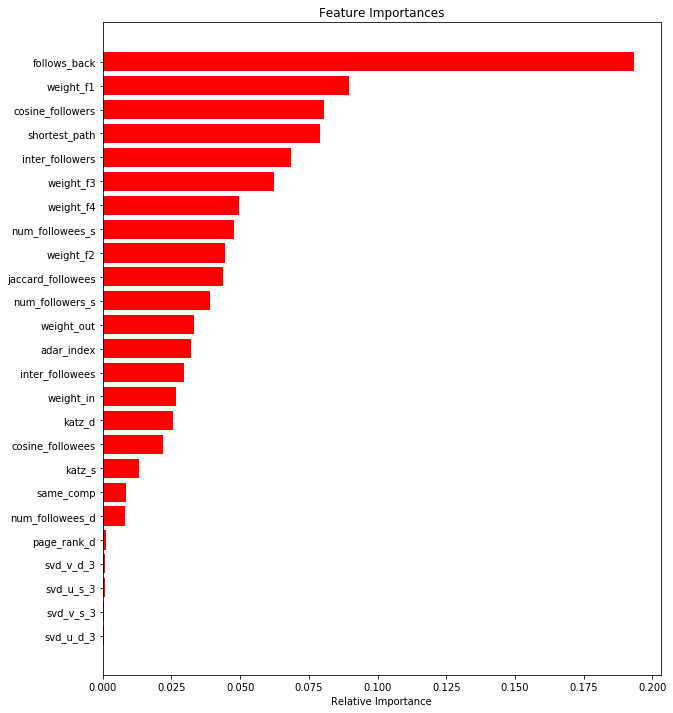

In [ ]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage5.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage5.h5', 'test_df',mode='r')

In [ ]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'followee_preferential_attachment', 'follower_preferential_attachment'],
      dtype='object')

In [ ]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [ ]:
# we dont need them 
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [ ]:
from contextlib import contextmanager
import datetime
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#refer:-https://www.youtube.com/watch?v=vOMtQ4ocMGI
@contextmanager
def timer(title):
    """ used to calculate time for each function"""
    t0 = time.time()
    yield
    print("{} - done in {:.000f}s".format(title, time.time() - t0))

In [ ]:
def number_of_estimators_xgboost(df_final_train,y_train, max_depth = 10,lr = 0.01, estimators = [10,15,20,25,30,35,50,75,90,100,110, 125,140,160,175,200, 225,250,325,500]):
  #hyper parameter tuning for the number of estimators 
  train_scores = []
  test_scores = []
  for i in estimators:
      clf = xgb.XGBClassifier(max_depth=max_depth,learning_rate=lr,n_estimators=i,n_jobs=-1,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 seed = random_s)
      clf.fit(df_final_train,y_train)
      train_sc = f1_score(y_train,clf.predict(df_final_train))
      test_sc = f1_score(y_test,clf.predict(df_final_test))
      test_scores.append(test_sc)
      train_scores.append(train_sc)
      print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)

  #plotting the results 
  plt.plot(estimators,train_scores,label='Train Score')
  plt.plot(estimators,test_scores,label='Test Score')
  plt.xlabel('Estimators')
  plt.ylabel('Score')
  plt.title('Estimators vs score at depth of 5')

Estimators =  10 Train Score 0.9772502272956864 test Score 0.932074835664925
Estimators =  15 Train Score 0.9785087276763191 test Score 0.9325445281906607
Estimators =  20 Train Score 0.9794134861848347 test Score 0.932654049388434
Estimators =  25 Train Score 0.9800438087355023 test Score 0.9329652498261438
Estimators =  30 Train Score 0.9805243975082536 test Score 0.9328580167485814
Estimators =  35 Train Score 0.9809647873812194 test Score 0.9331278109757385
Estimators =  50 Train Score 0.9823648103309119 test Score 0.9325669364552736
Estimators =  75 Train Score 0.9856718521874843 test Score 0.9317056658062878
Estimators =  90 Train Score 0.9886781828785167 test Score 0.9306125904915118
Estimators =  100 Train Score 0.9916163816905792 test Score 0.9298758527181051
Estimators =  110 Train Score 0.9938829947253364 test Score 0.9298502086908621
Estimators =  125 Train Score 0.9966461430645241 test Score 0.9292937859096403
Estimators =  140 Train Score 0.9979790703723712 test Score 0.9

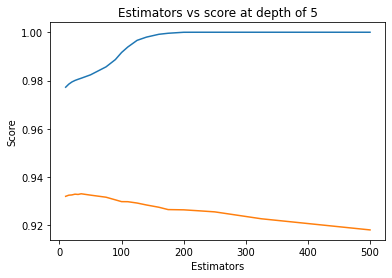

In [ ]:
with timer("number_of_estimators_func"):
  number_of_estimators_xgboost(df_final_train,y_train,10,0.1)

In [ ]:
def depth_xgboost(df_final_train,y_train, estimators = 10,lr = 0.01, depth = [3,5,7,8,10,11,14,15]):
  #hyper parameter tuning for the number of estimators 
  train_scores = []
  test_scores = []
  for i in depth:
      clf = xgb.XGBClassifier(max_depth=i,learning_rate=lr,n_estimators=estimators,n_jobs=-1,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 seed = random_s)
      clf.fit(df_final_train,y_train)
      train_sc = f1_score(y_train,clf.predict(df_final_train))
      test_sc = f1_score(y_test,clf.predict(df_final_test))
      test_scores.append(test_sc)
      train_scores.append(train_sc)
      print('Depth = ',i,'Train Score',train_sc,'test Score',test_sc)

  #plotting the results 
  plt.plot(depth,train_scores,label='Train Score')
  plt.plot(depth,test_scores,label='Test Score')
  plt.xlabel('Depth')
  plt.ylabel('Score')
  plt.title('Depth vs score at Estimators of 100')

Depth =  3 Train Score 0.9051339632209124 test Score 0.8975294485562391
Depth =  4 Train Score 0.9250871821042783 test Score 0.9248577092792736
Depth =  5 Train Score 0.9408372712700626 test Score 0.9239077489993435
Depth =  6 Train Score 0.9424883239543569 test Score 0.924651438742213
Depth =  7 Train Score 0.9637542300322093 test Score 0.9254350679595207
Depth =  8 Train Score 0.9695749395444841 test Score 0.928426994692055
Depth =  10 Train Score 0.9743781069444304 test Score 0.9311236829376012
Depth =  11 Train Score 0.9767113904669809 test Score 0.9317689606593914
Depth =  14 Train Score 0.9830474390170331 test Score 0.9310932144584394
Depth =  15 Train Score 0.9845213685522455 test Score 0.931600748543914
number_of_estimators_func - done in 28s


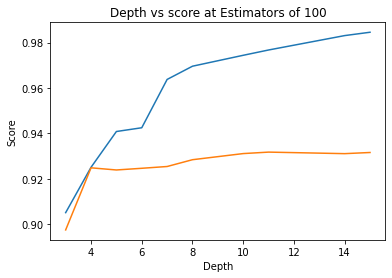

In [ ]:
with timer("number_of_estimators_func"):
  depth_xgboost(df_final_train,y_train, estimators = 10,lr = 0.01, depth = [3,4,5,6,7,8,10,11,14,15])

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

In [ ]:
param_dist = {"max_depth": sp_randint(3,7),
              "learning_rate":uniform(0,0.2),
              "n_estimators":sp_randint(10,40),
              "gamma": uniform(0,2),
              "subsample":uniform(0.7,0.3)}
estimator = xgb.XGBRFClassifier(objective= 'binary:logistic',
eval_metric= 'auc',scale_pos_weight = 1,random_state=random_s)
model_rs_xgb1 = RandomizedSearchCV(estimator, param_distributions=param_dist,
                                   scoring='f1',cv=5,n_jobs=-1, random_state = random_s)
model_rs_xgb1.fit(df_final_train,y_train)
model_rs_xgb1.best_params_, model_rs_xgb1.best_score_

({'gamma': 1.1713885370433155,
  'learning_rate': 0.08133802032504014,
  'max_depth': 6,
  'n_estimators': 28,
  'subsample': 0.8632408862914539},
 0.9378921098840305)

In [ ]:
print('mean test scores',model_rs_xgb1.cv_results_['mean_test_score'])


mean test scores [0.89778432 0.93576332 0.93789211 0.92646385 0.93285028 0.9264409
 0.89491771 0.93441779 0.93321466 0.92634741]


In [ ]:
final_clf = xgb.XGBRFClassifier(max_depth=6,learning_rate= 0.08133802032504014,n_estimators=28,
                        subsample =  0.8632408862914539,
                        gamma=1.1713885370433155,n_jobs=-1)

final_clf.fit(df_final_train,y_train)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=1.1713885370433155,
                learning_rate=0.08133802032504014, max_delta_step=0,
                max_depth=6, min_child_weight=1, missing=None, n_estimators=28,
                n_jobs=-1, nthread=None, objective='binary:logistic',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.8632408862914539,
                verbosity=1)

In [ ]:
predict_y_test_final = final_clf.predict(df_final_test)
predict_y_train_final = final_clf.predict(df_final_train)

print("The train f1 score is:",f1_score(y_train,predict_y_train_final))
print("The test f1 score is:",f1_score(y_test,predict_y_test_final))

The train f1 score is: 0.9285608009012265
The test f1 score is: 0.9257343195519262


In [ ]:

from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


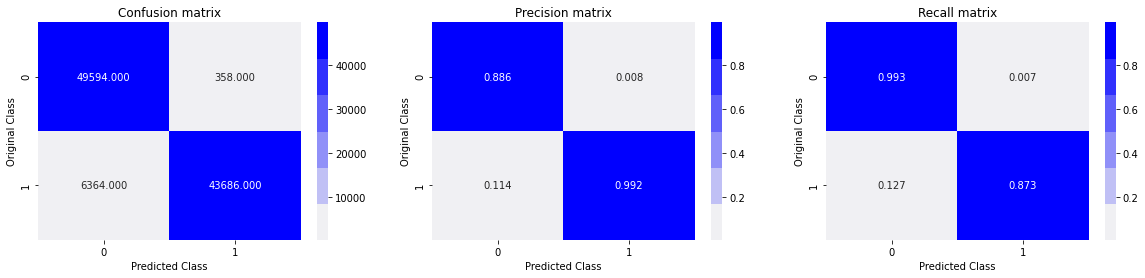

Test confusion_matrix


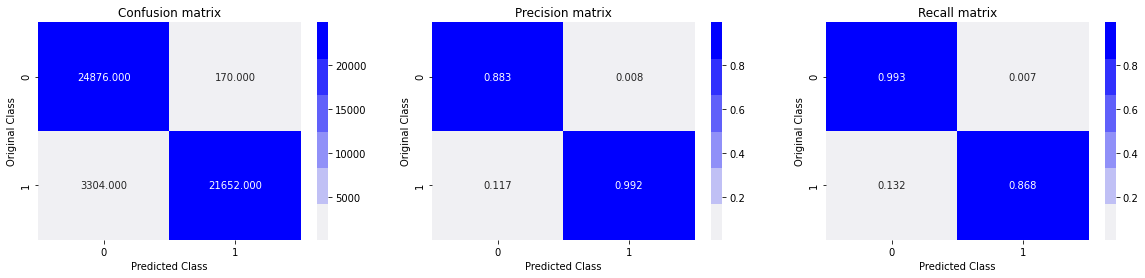

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,predict_y_train_final)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,predict_y_test_final)

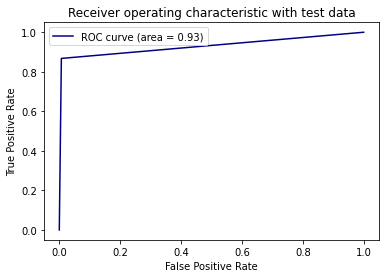

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr,tpr,ths = roc_curve(y_test,predict_y_test_final)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()


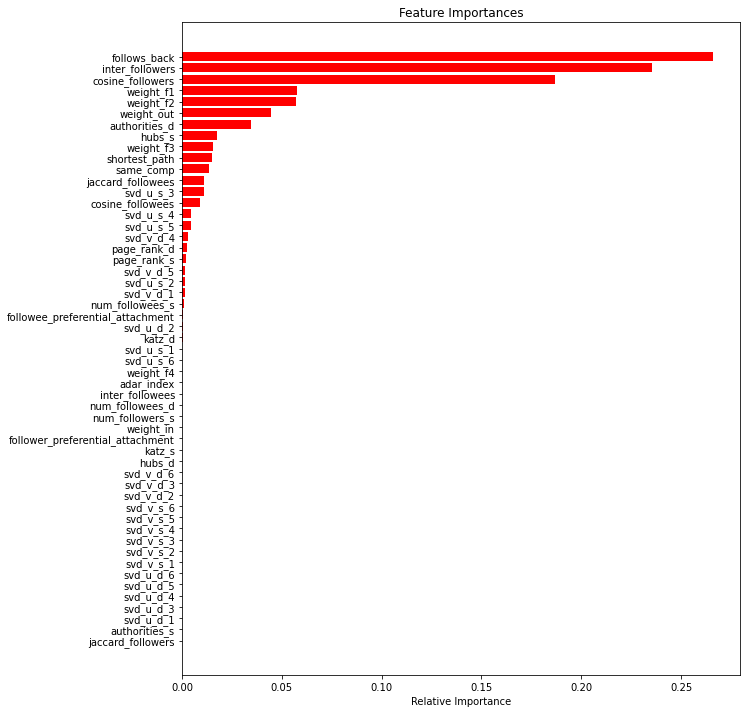

In [ ]:
features = df_final_train.columns
importances = final_clf.feature_importances_
indices = (np.argsort(importances))[:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ["Model", "n_estimators", "max_depth", "Train f1-Score","Test f1-Score"]
x.add_row(['Random Forest','151','17','0.961886520941639','0.9247307312771631'])
x.add_row(['XGBOOST','28','6','0.9285608009012265',' 0.9257343195519262'])
print(x)

+---------------+--------------+-----------+--------------------+---------------------+
|     Model     | n_estimators | max_depth |   Train f1-Score   |    Test f1-Score    |
+---------------+--------------+-----------+--------------------+---------------------+
| Random Forest |     151      |     17    | 0.961886520941639  |  0.9247307312771631 |
|    XGBOOST    |      28      |     6     | 0.9285608009012265 |  0.9257343195519262 |
+---------------+--------------+-----------+--------------------+---------------------+
